In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re

 ### Gathering Data

In [2]:
df_tweet_stats = pd.read_json('tweet-json.txt', lines=True)


In [3]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('imgage_predictions.tsv', 'wb') as f:
    f.write(r.content)

df_predictions = pd.read_csv('image_predictions.tsv', sep='\t')


In [4]:
df_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

 ### Assessing Data

In [5]:
df_predictions.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
df_predictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
print(df_predictions[(df_predictions['p1_conf'] > 1) | (df_predictions['p2_conf'] > 1) | (df_predictions['p3_conf'] > 1)].sum().sum())


0.0


In [8]:
df_predictions.isna().sum().sum()


np.int64(0)

In [9]:
df_predictions.duplicated().sum()


np.int64(0)

In [10]:
df_tweet_stats.head()


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [11]:
df_tweet_stats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [12]:
df_tweet_stats.isna().sum().sum()


np.int64(30513)

In [13]:
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [14]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [15]:
df_enhanced.isna().sum().sum()

np.int64(20915)

In [16]:
df_enhanced.duplicated().sum()

np.int64(0)

In [17]:
print(df_enhanced['timestamp'].dtype)

object


 ### Cleaning Data

#### Tideness

In [18]:
df_predictions = df_predictions[['tweet_id', 'p1', 'p1_conf', 'p1_dog']]

In [19]:
df_tweet_stats = df_tweet_stats[['id', 'retweet_count', 'favorite_count']]

In [20]:
df_enhanced = df_enhanced[['tweet_id', 'timestamp', 'rating_numerator']]

In [21]:
df_enhanced['timestamp'] = df_enhanced['timestamp'].astype('datetime64[ns, UTC]')

#### Quility

In [22]:
df_predictions.drop_duplicates(inplace=True)

In [23]:
df_predictions.dropna(inplace=True)

In [24]:
df_predictions = df_predictions[df_predictions['p1_conf'] > 0.2]

In [25]:
df_predictions = df_predictions[df_predictions['p1_dog'] == True]

In [26]:
df_tweet_stats.drop_duplicates(inplace=True)

In [27]:
df_tweet_stats.dropna(inplace=True)

In [28]:
df_enhanced.drop_duplicates(inplace=True)

In [29]:
df_enhanced['rating_numerator'][df_enhanced['rating_numerator'] > 10] = 10

C:\Users\shaim\AppData\Local\Temp\ipykernel_17316\4274642497.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_enhanced['rating_numerator'][df_enhanced['rating_numerator'] > 10] = 10
C:\Users\shaim\AppData\Local\Temp\ipykernel_17316\427

 ### Storing Data

In [30]:
df = pd.merge(right=df_tweet_stats, left=df_predictions, right_on='id', left_on='tweet_id', how= 'inner')
df = pd.merge(right=df, left=df_enhanced, right_on='id', left_on='tweet_id', how= 'inner')

In [31]:
df.drop('id', axis=1, inplace = True)
df.drop('tweet_id_y', axis=1, inplace = True)
df.drop('p1_conf', axis=1, inplace = True)
df.drop('p1_dog', axis=1, inplace = True)

In [32]:
df.rename(
    columns={'tweet_id_x': 'id', 'p1': 'Dog_name', 'rating_numerator': 'rating'},
    inplace=True
)

In [33]:
df.to_csv('twitter_archive_master.csv', index=False)


 ### Analyzing and Visualizing Data

 The most commonly predicted dog breed in the dataset is the golden retriever, followed by Labrador retriever and Pembroke.

In [34]:
df['Dog_name'].value_counts()


Dog_name
golden_retriever      147
Labrador_retriever     99
Pembroke               86
Chihuahua              79
pug                    56
                     ... 
groenendael             1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
Scottish_deerhound      1
Name: count, Length: 111, dtype: int64

 There’s a slight positive correlation (0.3) between the dog’s rating and tweet popularity, but it's not strong enough to say higher ratings consistently lead to higher engagement.

In [35]:
df['rating'].corr(df['retweet_count'])


np.float64(0.12878873169985663)

 This short report provides a summary of the number of occurrences for each dog breed with the highest rating (14). The top breeds like golden_retriever and Pembroke have the highest occurrences, each appearing 3 times.

In [36]:
top_rated = df[df['rating'] == df['rating'].max()]
top_rated['Dog_name'].value_counts()


Dog_name
golden_retriever      139
Labrador_retriever     91
Pembroke               81
Chihuahua              64
pug                    43
                     ... 
groenendael             1
Ibizan_hound            1
EntleBucher             1
standard_schnauzer      1
Scottish_deerhound      1
Name: count, Length: 109, dtype: int64

 This analyze provides retweet counts across different years. 2016 has the highest retweet count, followed by 2017, while 2015 has the lowest retweet count.

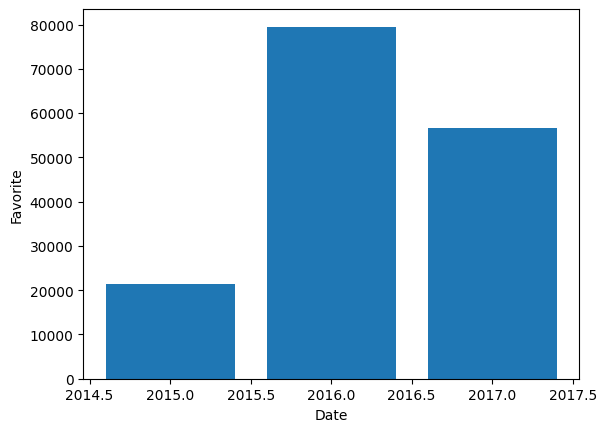

In [37]:
plt.bar(df['timestamp'].dt.year, df['retweet_count'])
plt.xlabel('Date')
plt.ylabel('Favorite')
plt.show()


 Golden Retrievers dominate tweets, but Pembrokes get higher ratings, suggesting breed choice impacts engagement differently

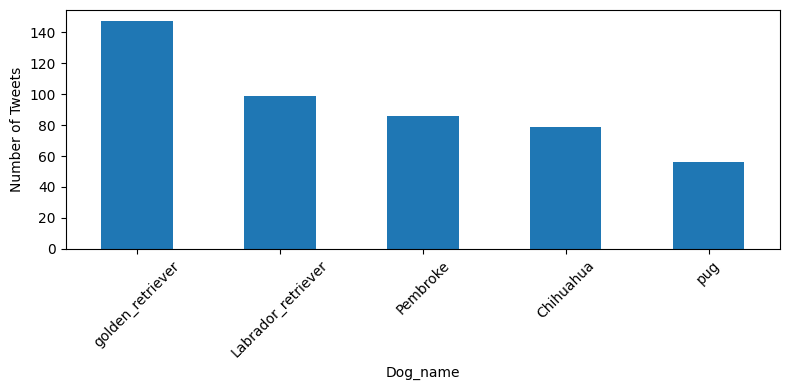

In [38]:
top_5 = df['Dog_name'].value_counts().head(5)
plt.figure(figsize=(8,4))
top_5.plot(kind='bar')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()